# Winter (DJF) and spring (MAM) Climatology of SST for the Northern California Current
## Downscaled model GFDL-ESM4, period 1994-2020

In [1]:
# import libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# Definitnions
ldp = '/Users/sol/Documents/LargeData/QIN/' # data folder
ldom = np.array([[41, 49],[-131, -122]]) # 230, 237

In [3]:
# open netctf file and select variable and time 
ds = xr.open_dataset(ldp+'/downscaled_data/ssp585/thetao/surface/GFDL-ESM4_r1i1p1f1_sd+ba_final_thetao_surface_depth_5_subset.nc')
ds.close()
ds.coords['lon'] = np.mod(ds.coords['lon'] + 180,360) - 180
ds = ds['thetao']
# select period and calculate seasonal climatology
ds1 = ds.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]), time=slice('1994-01-01','2020-12-31')).groupby('time.season').mean()

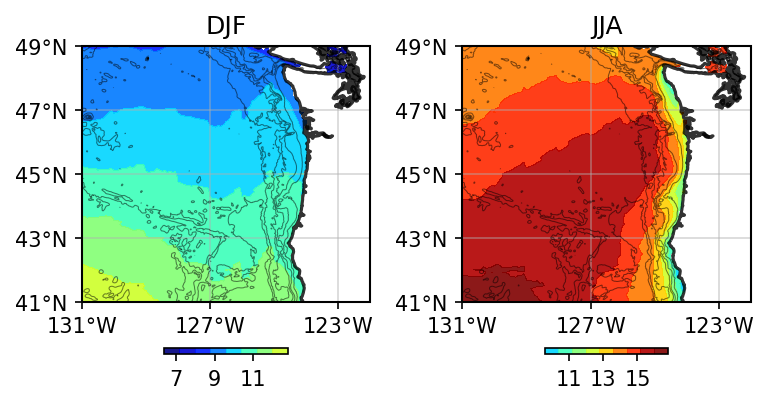

In [13]:
# plot
fig=plt.figure(figsize=(6,6),dpi=150)
for i in range(2):
    ax = fig.add_subplot(2, 2, i+1, projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
    ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
    ax.set_xticks(range(int(ldom[1,0]),int(ldom[1,1])+1,4), crs=ccrs.PlateCarree())
    ax.set_yticks(range(int(ldom[0,0]),int(ldom[0,1])+1,2), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    plt.grid(True, zorder=0,alpha=0.5)
    plt.contour(X,Y,topo2,[-3000,-2000,-1000,-500,-200, -100],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
    if i==0:
        dsx = ds1[0,:,:]
    else:
        dsx = ds1[1,:,:]
    plt.contourf(dsx.lon, dsx.lat, dsx, cmap='jet', alpha=0.9, vmin=7, vmax=16)
    cb = plt.colorbar(fraction=0.02, orientation='horizontal', ticks=range(7,17,2))
    plt.title(str(dsx.season.values),fontsize=12)
plt.tight_layout(h_pad=1)
plt.show()

In [5]:
# Bathymetry from ETOPO1
fn = ldp+'../Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)